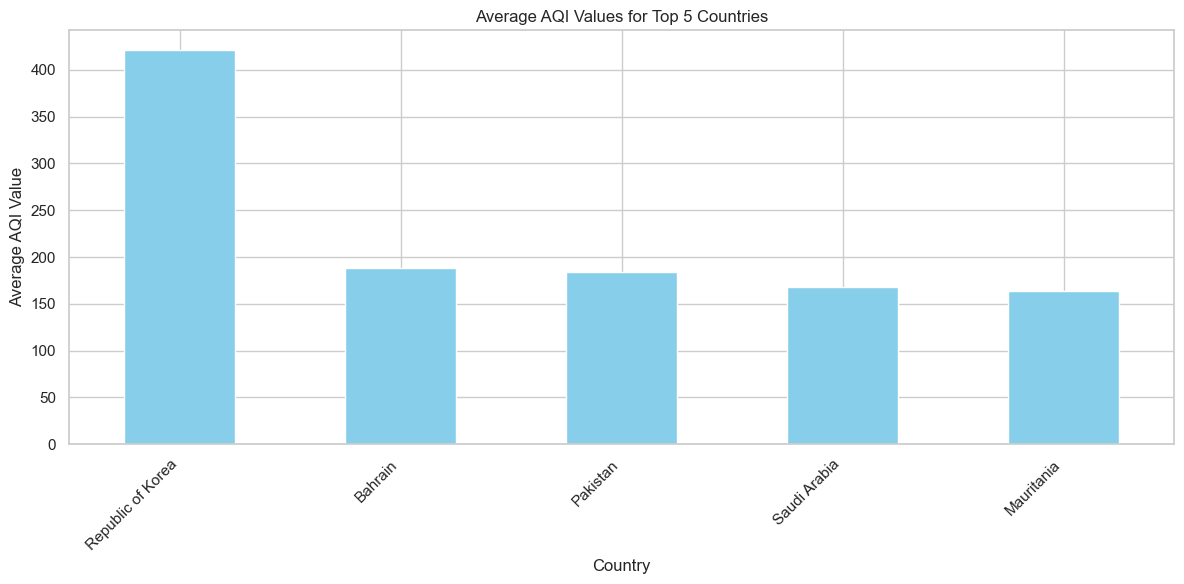

C:\Users\joywi\AppData\Local\Temp\ipykernel_21212\291103078.py:44: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='AQI Category', y='Value', hue='Pollutant', data=subset_melted, ci=None, palette='pastel')


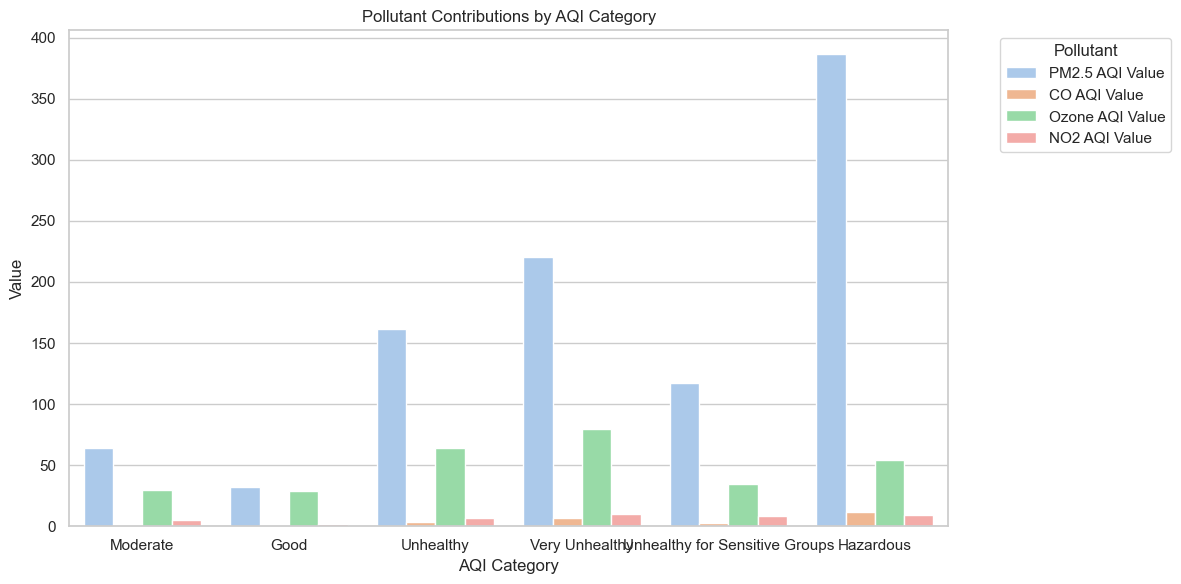

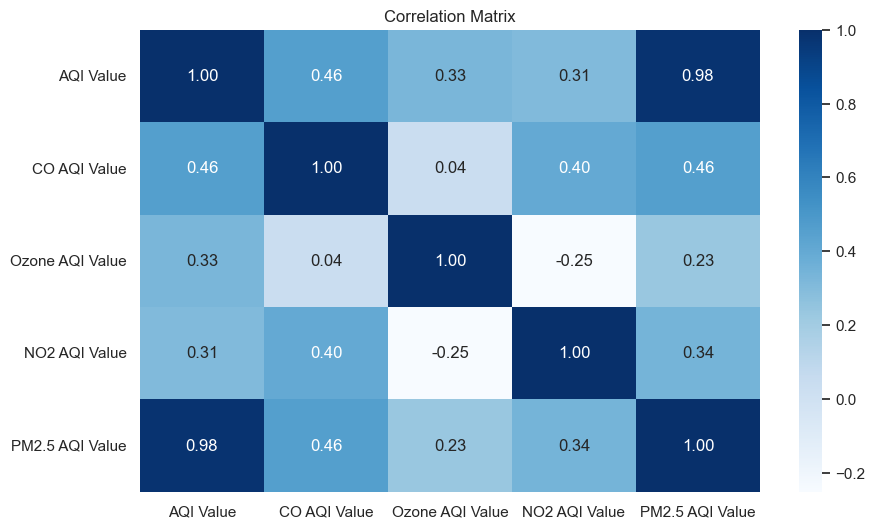

C:\Users\joywi\AppData\Local\Temp\ipykernel_21212\291103078.py:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='AQI Category', data=subset, palette="Set2")


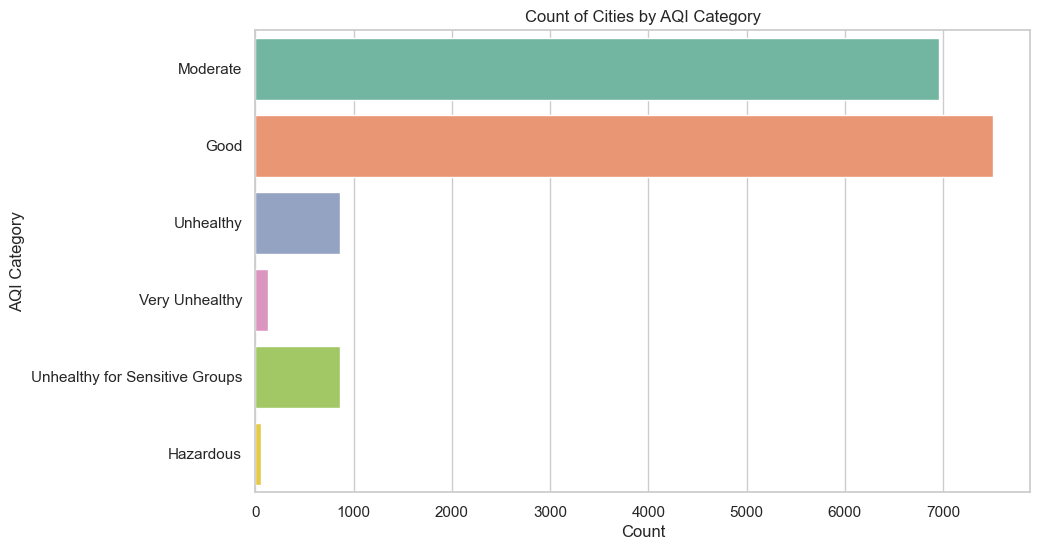

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
data = pd.read_csv("AQI and Lat Long of Countries.csv")

# Clean dataset (if needed)
data.dropna(subset=['AQI Value', 'Country', 'City'], inplace=True)

# Select subset for meaningful visualizations
subset = data[['AQI Value', 'Country', 'City', 'PM2.5 AQI Value', 'CO AQI Value', 'Ozone AQI Value', 'NO2 AQI Value', 'AQI Category']]

# Plot 1: Distribution of AQI Values by Top 5 Countries
plt.figure(figsize=(12, 6))
top_5_countries = subset.groupby('Country')['AQI Value'].mean().sort_values(ascending=False).head(5)
top_5_countries.plot(kind='bar', color='skyblue')
plt.title('Average AQI Values for Top 5 Countries')
plt.xlabel('Country')
plt.ylabel('Average AQI Value')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# Plot 3: Stacked Bar Chart of Pollutant Contributions by AQI Category
subset_melted = subset.melt(id_vars=['AQI Category'], 
                            value_vars=['PM2.5 AQI Value', 'CO AQI Value', 'Ozone AQI Value', 'NO2 AQI Value'],
                            var_name='Pollutant', value_name='Value')
plt.figure(figsize=(12, 6))
sns.barplot(x='AQI Category', y='Value', hue='Pollutant', data=subset_melted, ci=None, palette='pastel')
plt.title('Pollutant Contributions by AQI Category')
plt.xlabel('AQI Category')
plt.ylabel('Value')
plt.legend(title='Pollutant', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Plot 4: Heatmap of Correlation Matrix
corr = subset[['AQI Value', 'CO AQI Value', 'Ozone AQI Value', 'NO2 AQI Value', 'PM2.5 AQI Value']].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="Blues")
plt.title("Correlation Matrix")
plt.show()

# Plot 5: Count of Cities by AQI Category
plt.figure(figsize=(10, 6))
sns.countplot(y='AQI Category', data=subset, palette="Set2")
plt.title("Count of Cities by AQI Category")
plt.xlabel("Count")
plt.ylabel("AQI Category")
plt.show()
